  0%|          | 0/300 [00:00<?, ?it/s]

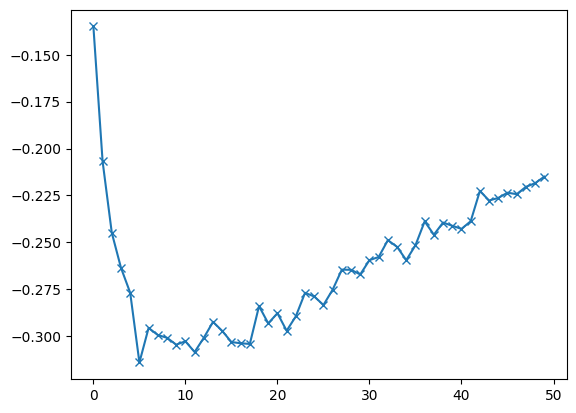

In [1]:
from pathlib import Path
from model import unidirectional, load_trained
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

foldername = "trained-unidirectional"
dirs = Path.cwd() / foldername

epochs = list(dirs.glob("Epoch */*.csv"))
similarity = {}
for i in tqdm(epochs):
    e = int(str(i).replace(str(dirs) + "\\", "").split("\\")[0].replace("Epoch ", ""))
    model = dirs / f"Epoch {e}" / f"classifier-{e}.pth"
    model = load_trained(model, unidirectional)

    scoring_weights = np.array(model.scoring_linear1.weight.tolist()[0])
    classify_weights = np.array(model.classifying_linear1.weight.tolist()[0])

    scoring_weights /= np.linalg.norm(scoring_weights)
    classify_weights /= np.linalg.norm(classify_weights)

    similarity[e] = np.dot(scoring_weights, classify_weights)

similarity = list(similarity.items())
similarity.sort(key = lambda x: x[0])
plt.plot([i[1] for i in similarity], marker = "x")
plt.show()

In [4]:
c1 = 20
c2 = 10

dir1 = Path.cwd() / "trained-unidirectional" / f"Epoch {c1}" / f"classifier-{c1}.pth"
dir2 = Path.cwd() / "trained-unidirectional-l2" / f"Epoch {c2}" / f"classifier-{c2}.pth"

model1 = np.array(load_trained(dir1, unidirectional).classifying_linear1.weight.tolist()[0])
model2 = np.array(load_trained(dir2, unidirectional).classifying_linear1.weight.tolist()[0])

model1 = model1 / np.linalg.norm(model1)
model2 = model2 / np.linalg.norm(model2)

np.dot(model1, model2)

0.4706665264518615

In [5]:
model1 = np.array(load_trained(dir1, unidirectional).scoring_linear1.weight.tolist()[0])
model2 = np.array(load_trained(dir2, unidirectional).scoring_linear1.weight.tolist()[0])

model1 = model1 / np.linalg.norm(model1)
model2 = model2 / np.linalg.norm(model2)

np.dot(model1, model2)

0.1459653811382088